In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive/')
loc = 'drive/MyDrive/Shtem2023/'

Mounted at /content/drive/


In [ ]:
x = np.random.rand(1000)

In [ ]:
y = np.sqrt(1 - x**2)

In [ ]:
def f(x):
  return x**2-4*x+x**3 +1/10*x**4

In [ ]:
x = x.reshape(1000,1)
y = y.reshape(1000,1)
input_shape = x[0].shape

model = tf.keras.Sequential([
tf.keras.layers.Dense(units=10,input_shape=input_shape)])
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Dense(units=10))
# after you create your model it's
# always a good habit to print out it's summary
model.summary()
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.01),

              # MAE error is good for
              # numerical predictions
              loss='mae')
losses = model.fit(x, y,

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch
                   )

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                20        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
4/4 [==============================] - 1s 5ms/step - loss: 0.7165
Epoch 2/15
4/4 [==============================] - 0s 4ms/step - loss: 0.5534
Epoch 3/15
4/4 [==============================] - 0s 3ms/step - loss: 0.4470
Epoch 4/15
4/4 [==============================] - 0s 4ms/step - loss: 0.3835
Epoch 5/15


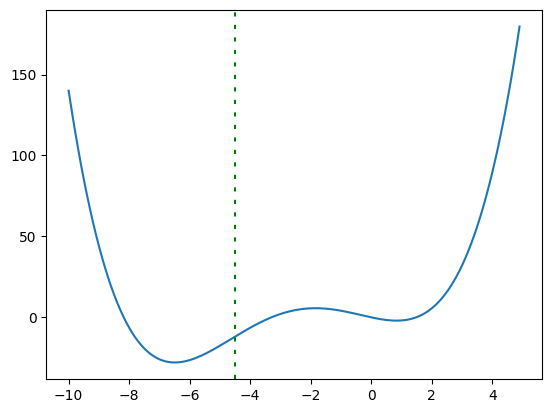

In [ ]:
guess = -4.5
xs = np.arange(-10,5,.1)
plt.plot(xs,f(xs))
plt.axvline(guess, color = 'green', dashes = (2,4))

In [ ]:
def df(x):
  return 2*x-4+3*x**2 +4/10*x**3


In [ ]:
df(guess)

11.299999999999997

In [ ]:
a = .1
newguess = guess-df(guess)*a

In [ ]:
newguess

-5.63

In [ ]:
loc = 'drive/MyDrive/Shtem2023/'
x2 = np.load(loc + 'x2.npy')
y2 = np.load(loc + 'y2.npy')

def polyguess(x2,par):
  return x2[:,0]*x2[:,1]*par


In [ ]:
par = 6
np.mean((polyguess(x2,7) - y2)**2)

90301984.03762284

$Error = MEAN(x_1*x_2*p - y_2)^2$

//

$\frac{dError}{dp} = MEAN(2 (x_1*x_2*p - y_2)x_1*x_2)$

In [ ]:
def dpolyguess(x2,par):
  return np.mean(2*(x2[:,0]*x2[:,1]*par-y2)*x2[:,0]*x2[:,1])

In [ ]:
dpolyguess(x2,par)
a = 1e-8

In [ ]:
nextpar = par -dpolyguess(x2,par)*a

In [ ]:
nextpar

5.586402570204747